In [1]:
import sys,os

import pyglet
pyglet.options['shadow_window'] = True

import pyrender#to display mesh
import numpy as np
import trimesh#to load mesh
import igl

import matplotlib
import matplotlib.pyplot as plt


from sklearn.neighbors import KDTree
from ICP_functions import *

%load_ext autoreload
%autoreload 2

In [3]:
obj_filenames=['bunny_v2/bun000_v2.obj']
make_obj_test_files(obj_filenames)
n_models=len(obj_filenames)

In [4]:
#Save multiple rotated versions of M1.

M2_v, M2_f = igl.read_triangle_mesh('M1.obj')#Get vertices and faces of M1.

for i in range(1,16):
    theta=(2*np.pi/(360))*5*i#angle is 5i degrees.
    rotation=np.array([[1.0,0.0,0.0],
                  [0.0,np.cos(theta), -np.sin(theta)],
                  [0.0,np.sin(theta),np.cos(theta)]])
    v = ((rotation@M2_v.T).T)
    f = M2_f
    
    igl.write_triangle_mesh("M2_"+str(5*i)+"deg.obj", v, f)

for i in range(1,19):
    theta=-(2*np.pi/(360))*5*i#angle is 5i degrees.
    rotation=np.array([[1.0,0.0,0.0],
                  [0.0,np.cos(theta), -np.sin(theta)],
                  [0.0,np.sin(theta),np.cos(theta)]])#out of the screen axis
    
    #rotation=np.array([
    #              [np.cos(theta), -np.sin(theta),0.0],
    #              [np.sin(theta),np.cos(theta),0.0],
    #                [0.0,0.0,1.0]])#upwards axis
    
    v = ((rotation@M2_v.T).T)
    f = M2_f
    
    igl.write_triangle_mesh("M2_minus"+str(5*i)+"deg.obj", v, f)


In [5]:
#Render the rotated versions of the model.

M1_fp='M1.obj'
tm1 = trimesh.load_mesh(M1_fp)#load mesh
surface_points1 = tm1.sample(20000)#sample points for a point cloud
mesh_rd1 = pyrender.Mesh.from_points(surface_points1, colors=(0.0,0.0,1.0))#make a point cloud object

positive_tms=[tm1]
negative_tms=[tm1]
positive_mesh_rds=[mesh_rd1]
negative_mesh_rds=[mesh_rd1]

for i in range(1,16):
    M2_fp="M2_"+str(5*i)+"deg.obj"
    tm2 = trimesh.load_mesh(M2_fp)#load mesh
    positive_tms.append(tm2)
    
    surface_points2 = tm2.sample(20000)#sample points for a point cloud
    mesh_rd2 = pyrender.Mesh.from_points(surface_points2, colors=(1.0-i/16,i/16,0.0))#make a point cloud object
    positive_mesh_rds.append(mesh_rd2)

for i in range(1,19):
    M2_fp="M2_minus"+str(5*i)+"deg.obj"
    tm2 = trimesh.load_mesh(M2_fp)#load mesh
    surface_points2 = tm2.sample(20000)#sample points for a point cloud
    mesh_rd2 = pyrender.Mesh.from_points(surface_points2, colors=(1.0-i/16,i/16,0.0))#make a point cloud object
    negative_mesh_rds.append(mesh_rd2)
    
show_mesh_gui(positive_mesh_rds)#Display meshes. M1 is coloured blue. M2 rotations are coloured according to angle.
show_mesh_gui(negative_mesh_rds)#Display meshes. M1 is coloured blue. M2 rotations are coloured according to angle.

In [17]:
#Do ICP for the positive angle rotations.

#P=positive_tms[0].sample(50000)
P,f_P=igl.read_triangle_mesh('M1.obj')

experiment1_results = {"mses":[],"iterations":[],"rotations":[],"translations":[]}

for i in range(1,16):
    print('Processing for angle +'+str(5*i)+' degrees... ',end='')
    
    #Q=positive_tms[i+1].sample(50000)
    Q,f_Q=igl.read_triangle_mesh("M2_"+str(5*i)+"deg.obj")
    
    R,t,mse_losses,iterations=ICP(P,Q)
    
    experiment1_results['rotations'].append(R)
    experiment1_results['translations'].append(t)
    experiment1_results['mses'].append(mse_losses)
    experiment1_results['iterations'].append(iterations)
    

Processing for angle +5 degrees... ICP converged after 19 iterations.
Processing for angle +10 degrees... ICP converged after 26 iterations.
Processing for angle +15 degrees... ICP converged after 30 iterations.
Processing for angle +20 degrees... ICP converged after 32 iterations.
Processing for angle +25 degrees... ICP converged after 35 iterations.
Processing for angle +30 degrees... ICP converged after 37 iterations.
Processing for angle +35 degrees... ICP converged after 38 iterations.
Processing for angle +40 degrees... ICP converged after 38 iterations.
Processing for angle +45 degrees... ICP converged after 38 iterations.
Processing for angle +50 degrees... ICP converged after 37 iterations.
Processing for angle +55 degrees... ICP converged after 37 iterations.
Processing for angle +60 degrees... ICP converged after 39 iterations.
Processing for angle +65 degrees... ICP converged after 52 iterations.
Processing for angle +70 degrees... ICP converged after 47 iterations.
Process

In [20]:
#Do ICP for the negative angle rotations.
P, f_P = igl.read_triangle_mesh(M1_fp)
experiment2_results = {"mses":[],"iterations":[],"rotations":[],"translations":[]}

for i in range(1,19):
    print('Processing for angle -'+str(5*i)+' degrees... ',end='')
    M2_fp="M2_minus"+str(5*i)+"deg.obj"
    Q, f_Q = igl.read_triangle_mesh(M2_fp)
    R,t,mse_losses,iterations=ICP(P,Q)
    
    experiment2_results['rotations'].append(R)
    experiment2_results['translations'].append(t)
    experiment2_results['mses'].append(mse_losses)
    experiment2_results['iterations'].append(iterations)

Processing for angle -5 degrees... ICP converged after 19 iterations.
Processing for angle -10 degrees... ICP converged after 25 iterations.
Processing for angle -15 degrees... ICP converged after 29 iterations.
Processing for angle -20 degrees... ICP converged after 32 iterations.
Processing for angle -25 degrees... ICP converged after 39 iterations.
Processing for angle -30 degrees... ICP converged after 40 iterations.
Processing for angle -35 degrees... ICP converged after 42 iterations.
Processing for angle -40 degrees... ICP converged after 44 iterations.
Processing for angle -45 degrees... ICP converged after 45 iterations.
Processing for angle -50 degrees... ICP converged after 45 iterations.
Processing for angle -55 degrees... ICP converged after 43 iterations.
Processing for angle -60 degrees... ICP converged after 43 iterations.
Processing for angle -65 degrees... ICP converged after 42 iterations.
Processing for angle -70 degrees... ICP converged after 44 iterations.
Process

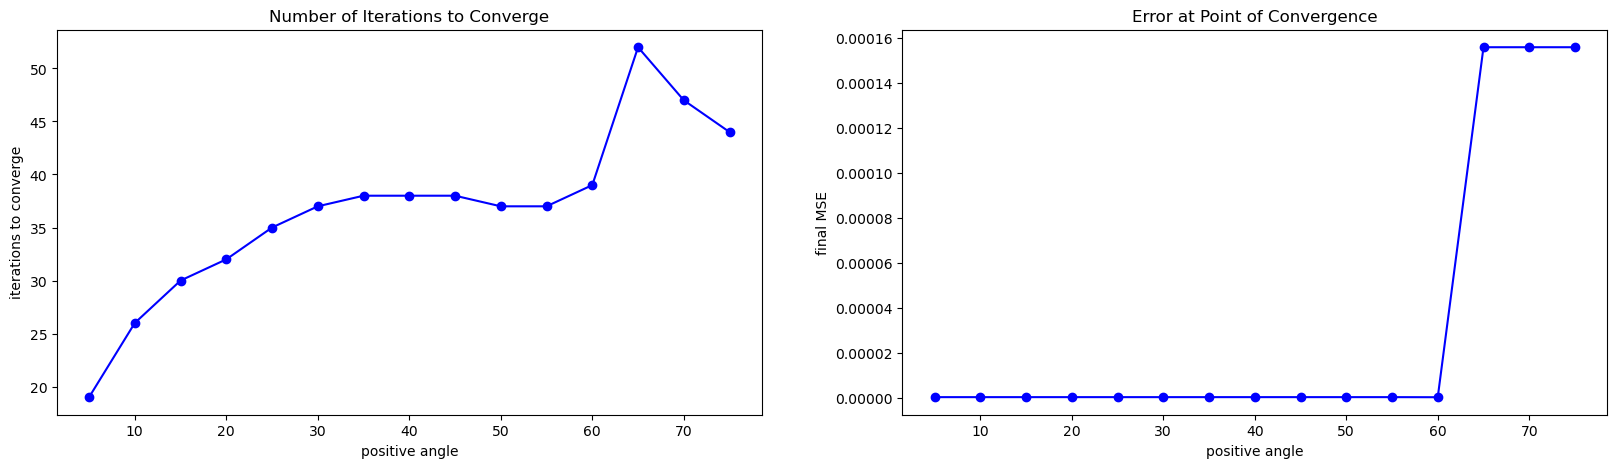

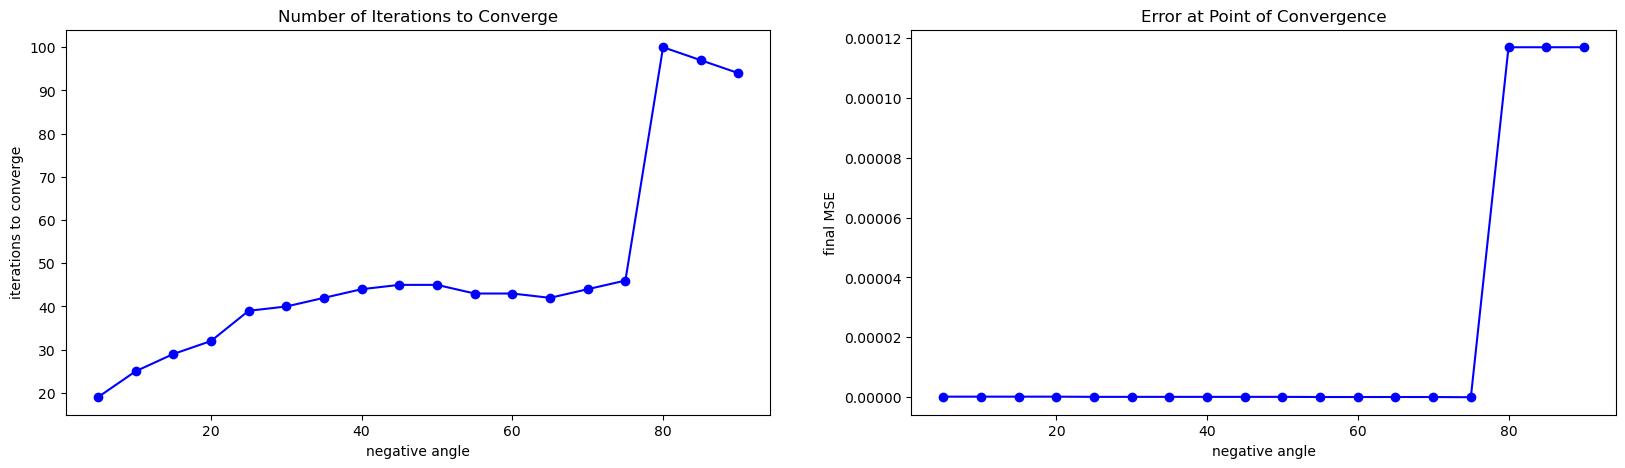

True

In [21]:
#Plot summary data.
angles=[i*5 for i in range(1,16)]
plot_summary_data(angles,experiment1_results['mses'],experiment1_results['iterations'],'positive angle')

angles=[i*5 for i in range(1,19)]
plot_summary_data(angles,experiment2_results['mses'],experiment2_results['iterations'],'negative angle')


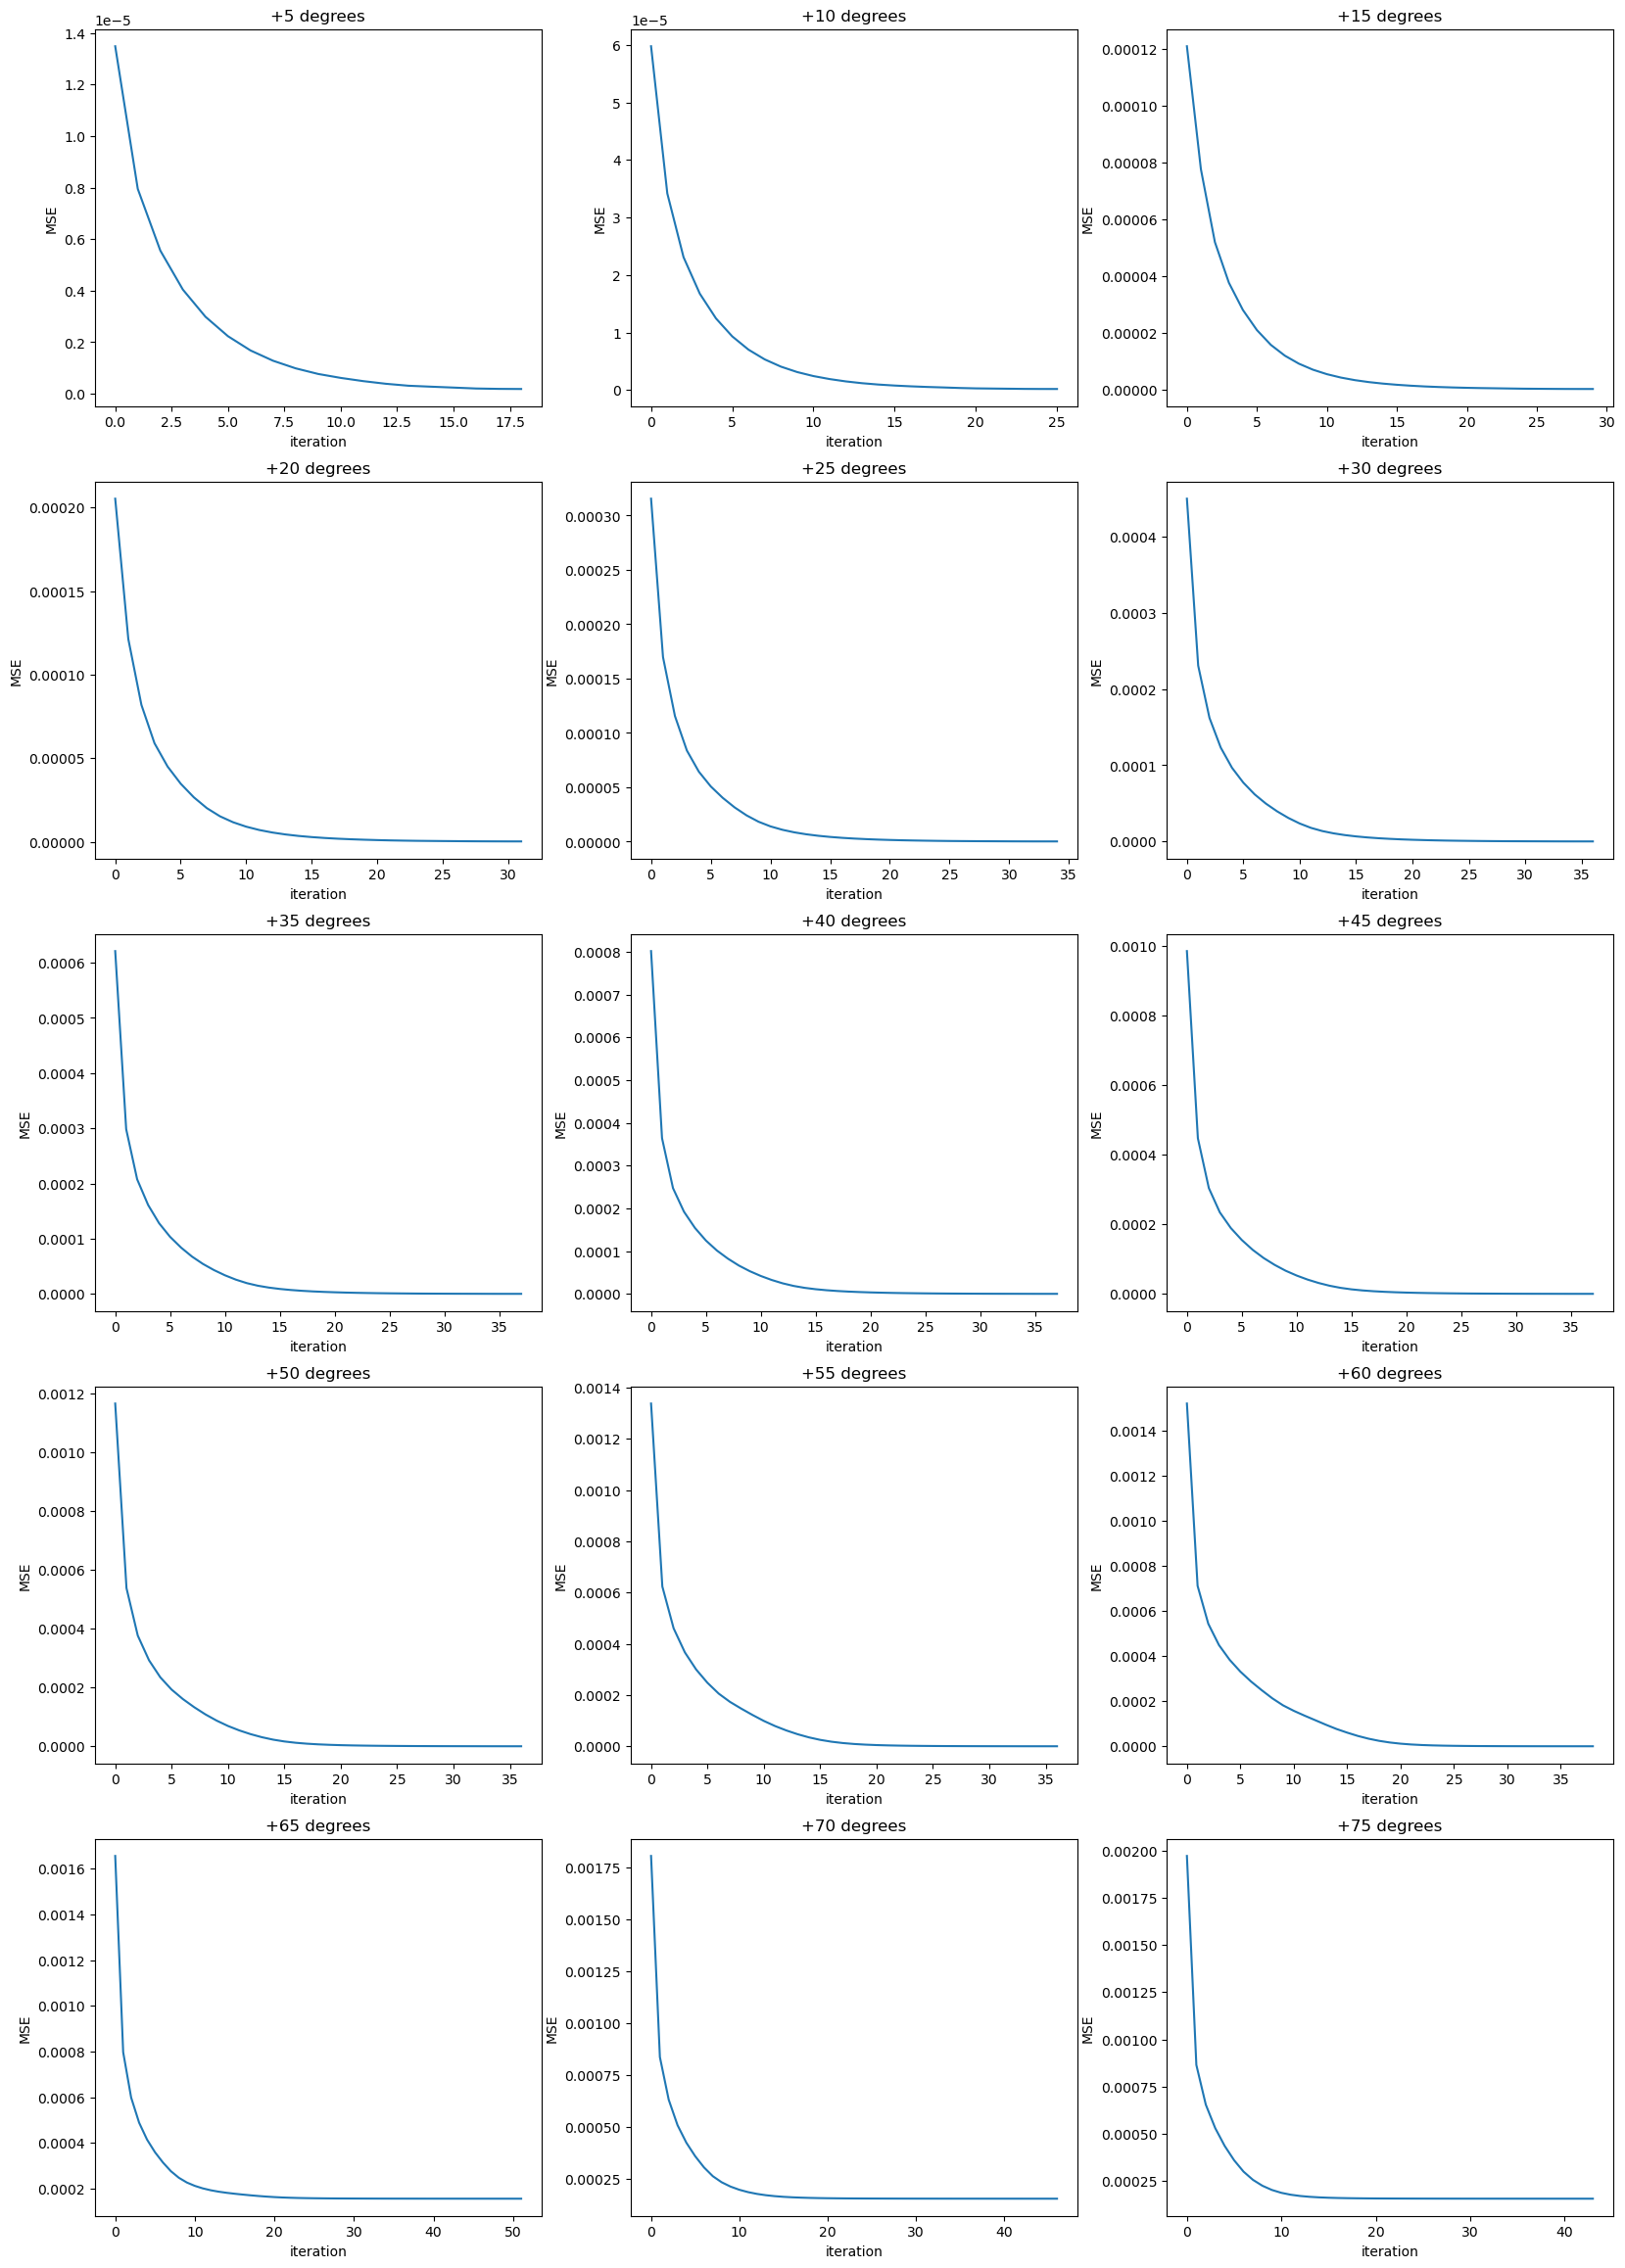

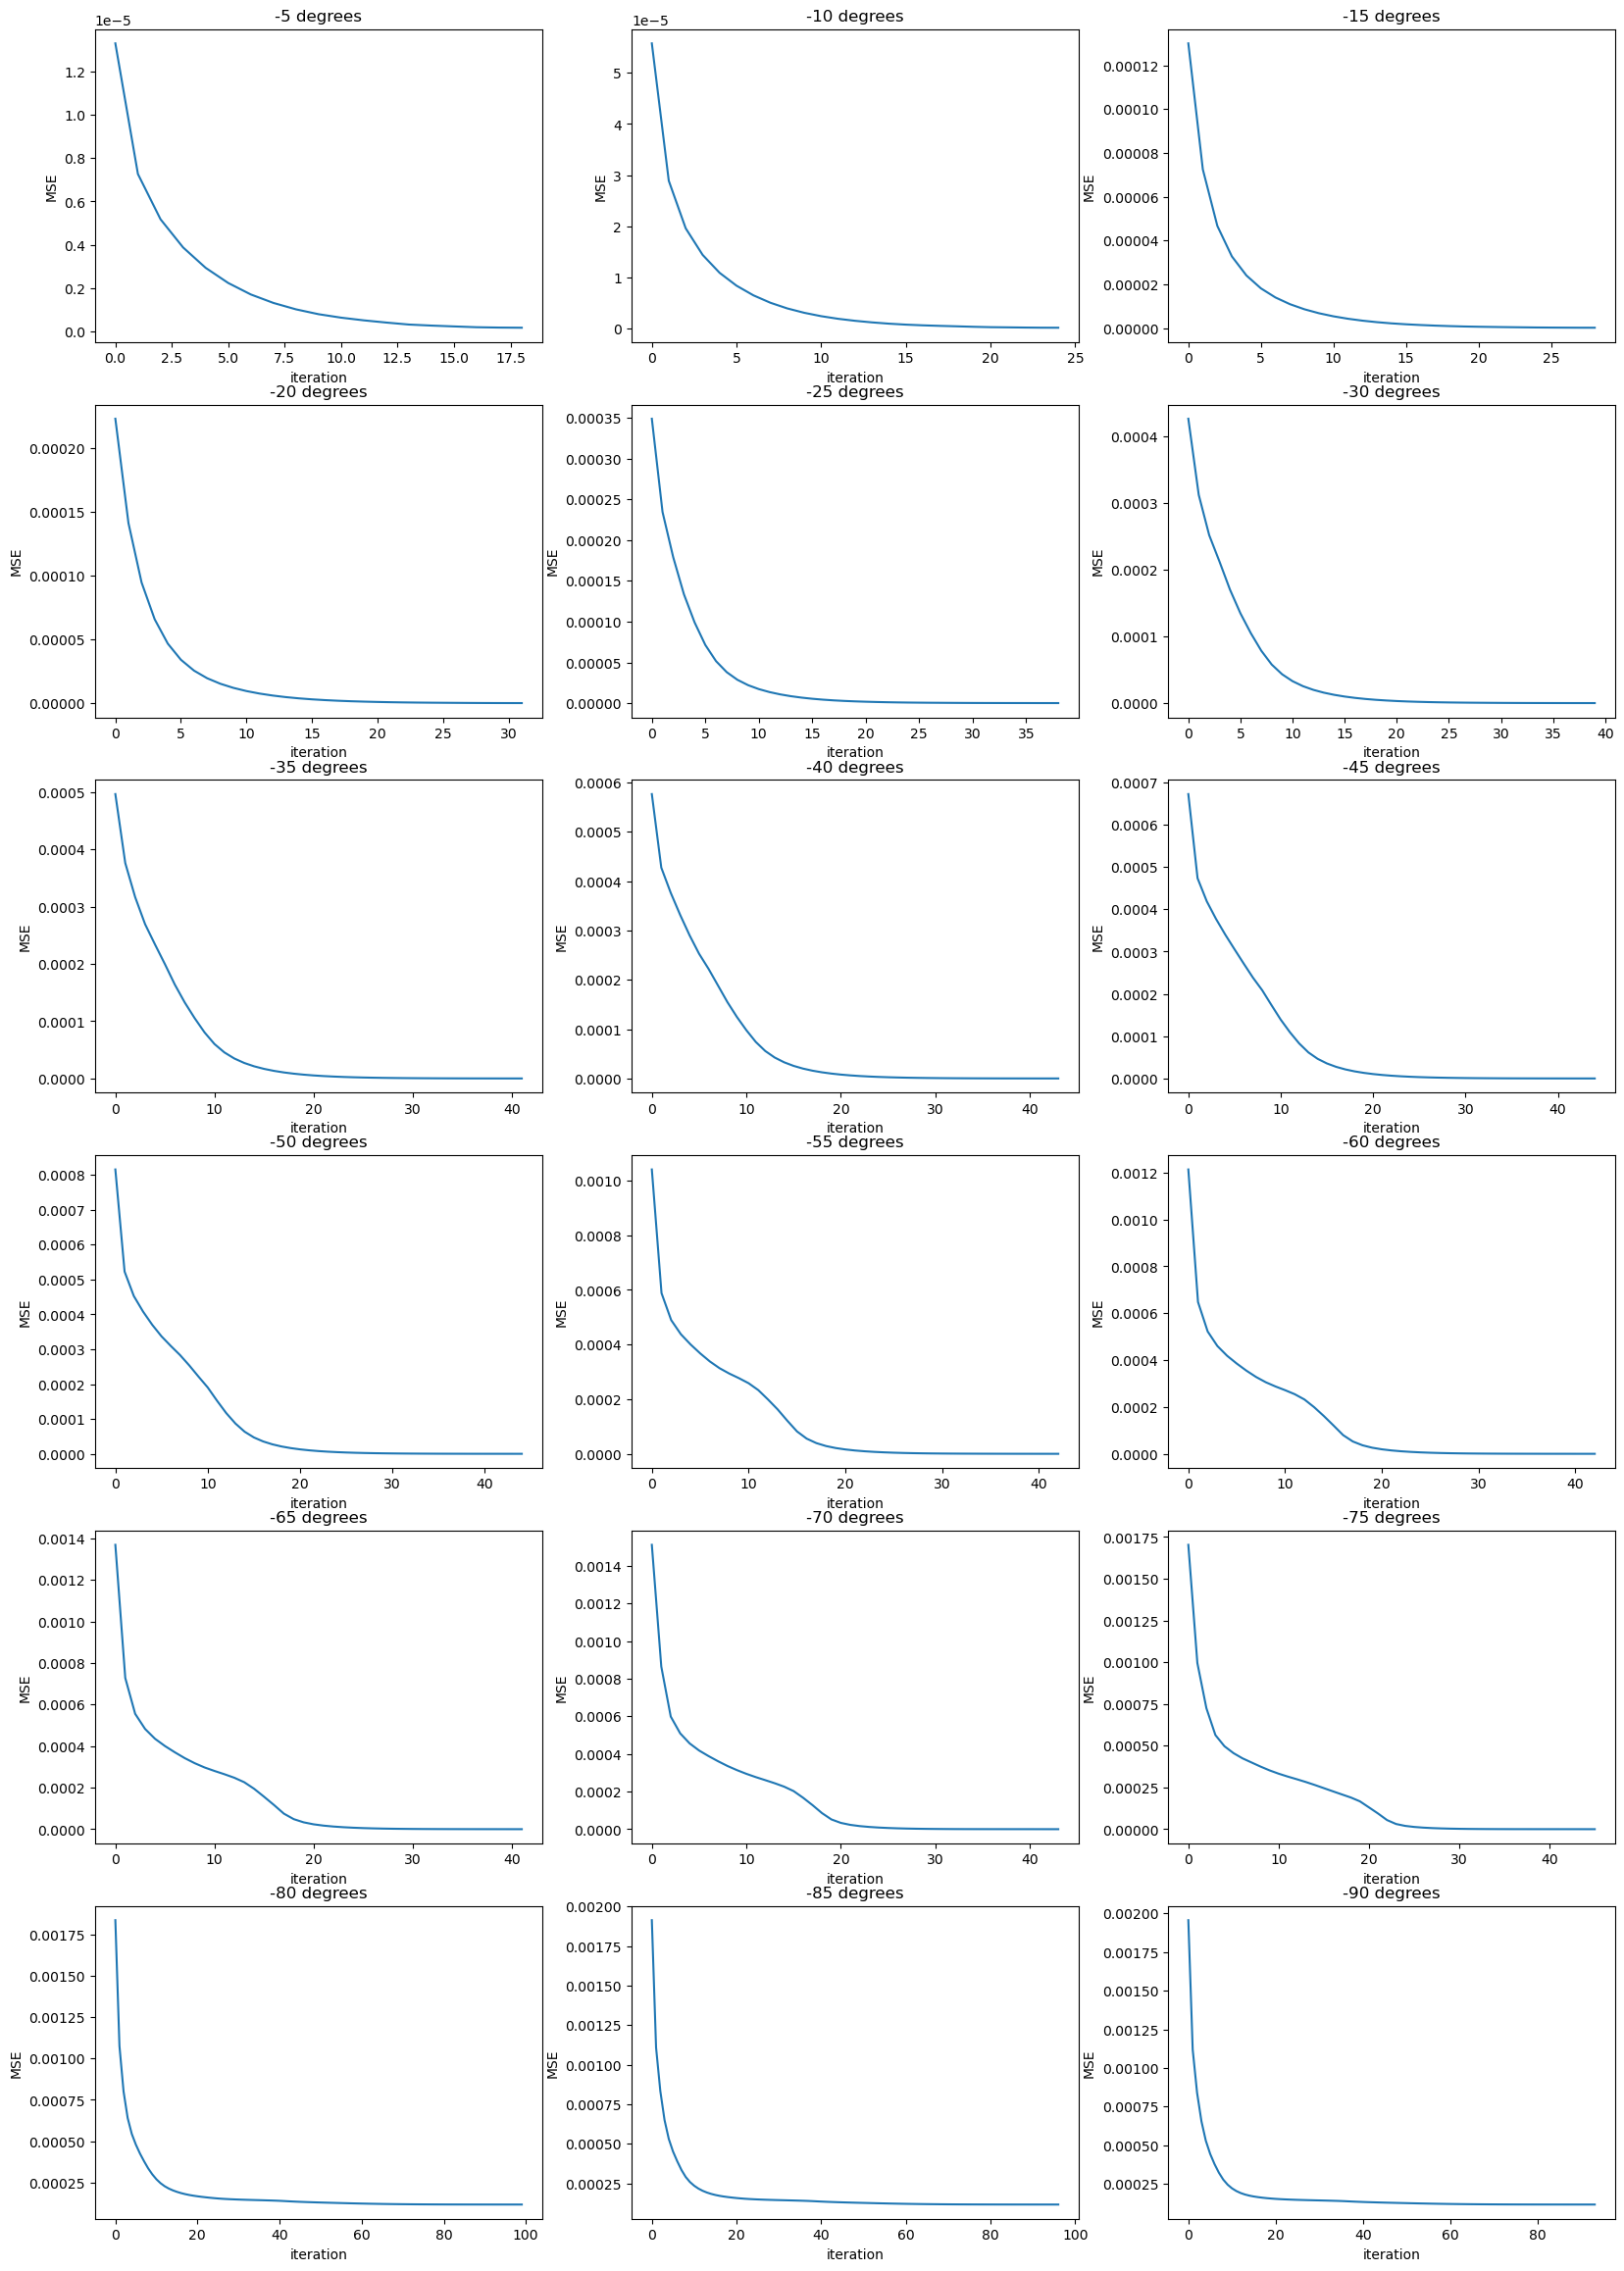

In [57]:
#Detailed plots. (Plot loss curves for every angle.)
titles=[('+'+str(5*(i+1))+' degrees') for i in range(16)]
plot_all_losses(5,3,experiment1_results['mses'],titles,figsize=(20,29))

titles=[('-'+str(5*(i+1))+' degrees') for i in range(19)]
plot_all_losses(6,3,experiment2_results['mses'],titles,figsize=(20,29))